In [1]:
#Q1
import numpy as np
import scipy.stats as stats

def gibbs_sampler(n, m, s, num_iter=10000):
    theta = np.mean(m)
    tau = 1 / np.var(m)
    
    theta_samples = np.zeros(num_iter)
    tau_samples = np.zeros(num_iter)

    for i in range(num_iter):
        theta_var = 1 / (n * tau + 1)
        theta_mean = theta_var * (n * tau * np.mean(m))
        theta = np.random.normal(theta_mean, np.sqrt(theta_var))
        alpha = n / 2
        beta = 0.5 * np.sum((m - theta) ** 2)
        tau = np.random.gamma(alpha, 1 / beta)

        theta_samples[i] = theta
        tau_samples[i] = tau

    return theta_samples, tau_samples
n = 100
m = np.random.normal(10, 2, size=n)
s = 2
theta_samples, tau_samples = gibbs_sampler(n, m, s)

print(f"Posterior mean of theta: {np.mean(theta_samples)}")
print(f"Posterior mean of tau: {np.mean(tau_samples)}")


Posterior mean of theta: 9.625495995794811
Posterior mean of tau: 0.24549664002128074


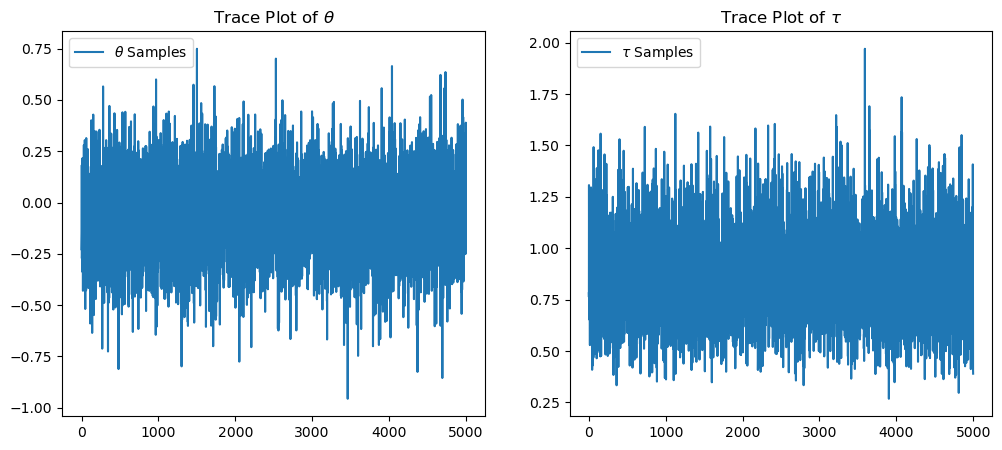

In [3]:
#Q2
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def gibbs_sampler(n, x, theta0, tau0, alpha, lambd, num_iter=10000):
    theta = np.mean(x)
    tau = 1 / np.var(x)

    theta_samples = np.zeros(num_iter)
    tau_samples = np.zeros(num_iter)

    for i in range(num_iter):
        theta_var = 1 / (n * tau + 1 / tau0)
        theta_mean = theta_var * (n * tau * np.mean(x) + theta0 / tau0)
        theta = np.random.normal(theta_mean, np.sqrt(theta_var))
        alpha_post = alpha / 2 + n / 2
        beta_post = lambd / 2 + 0.5 * np.sum((x - theta) ** 2)
        tau = np.random.gamma(alpha_post, 1 / beta_post)

        theta_samples[i] = theta
        tau_samples[i] = tau

    return theta_samples, tau_samples
n = 30
x = np.random.normal(0, 1, size=n)
theta0 = 0
tau0 = 1
alpha = 2
lambd = 2
num_iter = 10000

theta_samples, tau_samples = gibbs_sampler(n, x, theta0, tau0, alpha, lambd, num_iter)

burn_in = 5000
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(theta_samples[burn_in:], label=r'$\theta$ Samples')
ax[0].set_title(r'Trace Plot of $\theta$')
ax[0].legend()

ax[1].plot(tau_samples[burn_in:], label=r'$\tau$ Samples')
ax[1].set_title(r'Trace Plot of $\tau$')
ax[1].legend()

plt.show()


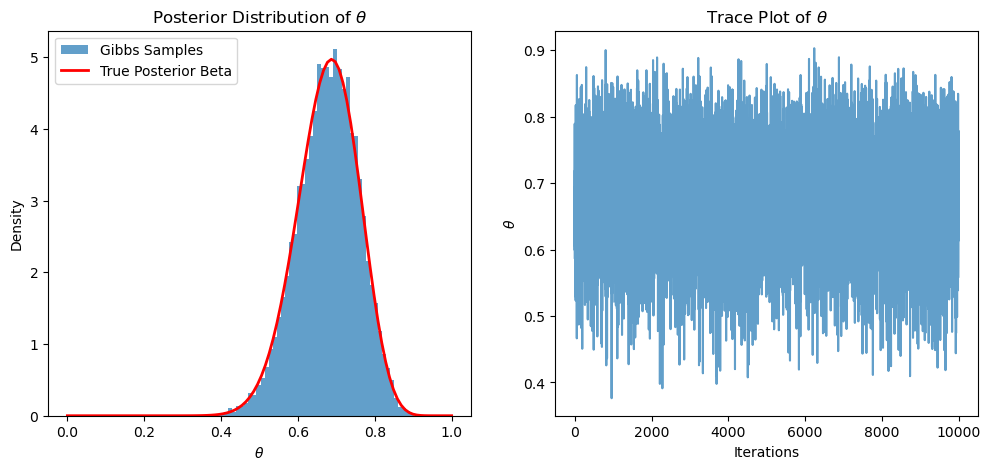

Gibbs Sample Mean: 0.6777
Theoretical Posterior Mean: 0.6765


In [4]:
#Q3
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(42)
n = 30
theta_true = 0.6
x = np.random.binomial(1, theta_true, size=n)
sum_x = np.sum(x)

a, b = 2, 2

num_iter = 10000
theta_samples = np.zeros(num_iter)

theta = np.random.beta(a, b)

for i in range(num_iter):
    theta = np.random.beta(a + sum_x, b + n - sum_x)
    theta_samples[i] = theta

theta_range = np.linspace(0, 1, 100)
posterior_pdf = stats.beta.pdf(theta_range, a + sum_x, b + n - sum_x)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(theta_samples, bins=50, density=True, alpha=0.7, label="Gibbs Samples")
ax[0].plot(theta_range, posterior_pdf, 'r-', lw=2, label="True Posterior Beta")
ax[0].set_title(r'Posterior Distribution of $\theta$')
ax[0].set_xlabel(r'$\theta$')
ax[0].set_ylabel('Density')
ax[0].legend()

ax[1].plot(theta_samples, alpha=0.7)
ax[1].set_title(r'Trace Plot of $\theta$')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel(r'$\theta$')

plt.show()

print(f"Gibbs Sample Mean: {np.mean(theta_samples):.4f}")
print(f"Theoretical Posterior Mean: {(a + sum_x) / (a + b + n):.4f}")
